In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
from utils import *

In [2]:
modelname = 'unet_v0.1'
h5_path = '../data/dataoncosalud/res_valid/comp_env_data.h5'
dataset = 'comp_env_interp_1'
n = 57 # H,W of each window

In [3]:
with open('data_splits.pkl', 'rb') as file:
    data_splits = pickle.load(file)

test_files = data_splits['test_files']
test_files.sort()
Q1 = data_splits['Q1']

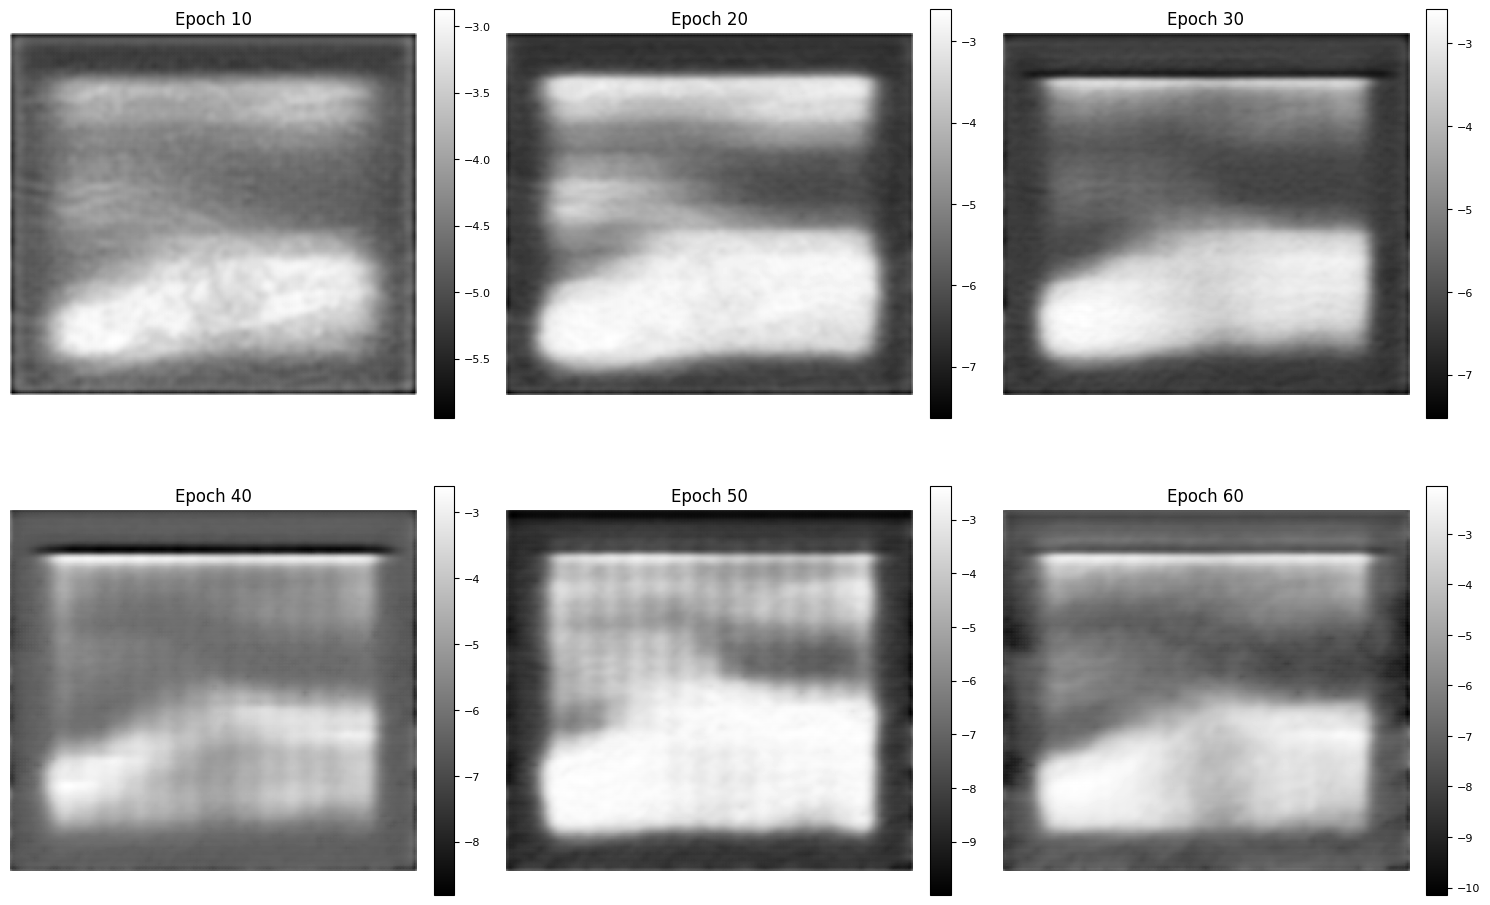

In [8]:
# fig, axes = plt.subplots(4, 3, figsize=(15, 20))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# for idx, epoch in enumerate(range(5, 61, 5)):
for idx, epoch in enumerate(range(10, 61, 10)):
    unet_outputs = np.load(f'outputs/{modelname}/test_outputs_epoch_{epoch}.npy')
    axes[idx].imshow(unet_outputs[50, 0, :, :], cmap='gray')
    axes[idx].set_title(f'Epoch {epoch}')
    axes[idx].axis('off')
    cbar = plt.colorbar(axes[idx].images[0], ax=axes[idx], fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

Test file: file_541



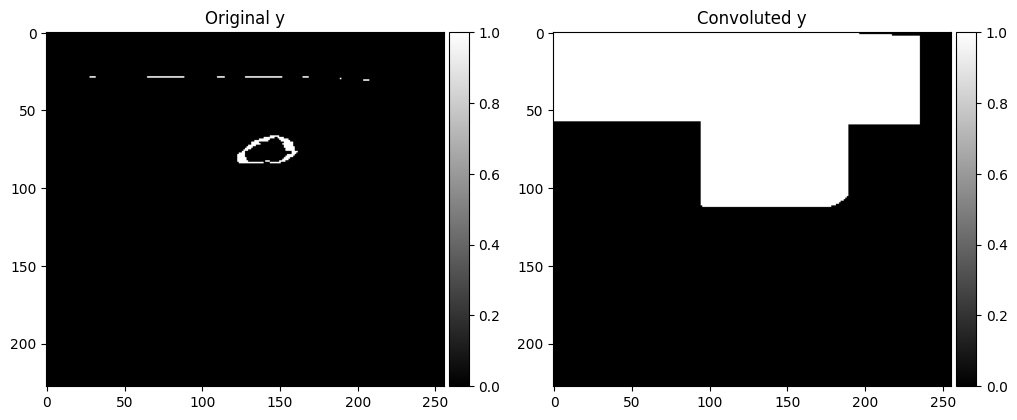

{0.0: 58102, 1.0: 266}


In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

for i in [50]:
    print('Test file:', test_files[i])
    print('')
    x = load_h5_dataset(h5_path, test_files[i], dataset)[:Q1,:]
    y = load_h5_dataset(h5_path, test_files[i], 'validRS')[:Q1,:]
    y[-(n-1)//2:, :] = 0

    if x.shape[1] == 512:
        x = x[:, ::2]
        y = y[:, ::2]
    
    kernel = np.ones((n, n))
    y_convoluted = convolve2d(y, kernel, mode='same')
    y_convoluted = (y_convoluted > 0).astype(int)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.set_title('Original y')
    im1 = ax1.imshow(y, cmap='gray')
    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax1)

    ax2.set_title('Convoluted y')
    im2 = ax2.imshow(y_convoluted, cmap='gray')
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax2)

    plt.show()

    unique, counts = np.unique(y, return_counts=True)
    print(dict(zip(unique, counts)))